# mock 'graphs for mom' 
my mother needed me to make some graphs for her to submit to a journal, and with ample effort wrangling the font manager, i did. 

i know some of the values are outlandish and the units are nonsensical. **the data and units in the jupyter notebook saved to this repository are fake.** out of respect for my mom, and out of regard for our privacy, i am not publishing her data in this random space on the internet. i'm just saving the jupyter notebook here to log some of my progress in practising with python.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.font_manager 
from matplotlib.font_manager import FontProperties

In [2]:
# identifying font 
personal_path = "/home/phisherman7/miniconda3/envs/pleasehelp/fonts/"

# regular tnr
font_path_1 = personal_path + "times.ttf"
tnr = FontProperties(fname=font_path_1)

# bold tnr
font_path_2 = personal_path + "timesbd.ttf"
tnr_b = FontProperties(fname=font_path_2)

In [3]:
# mean [CENSORED] per [CENSORED]
data_means = {"Blueberry": [200, 50, 0], 
        "Pineapple":[0, 200, 50]}
data_sd = {"Blueberry": ["[200]", "[50]", "[0]"], 
        "Pineapple":["[0]", "[200]", "[90]"]}
data_means = pd.DataFrame(data_means)
data_sd = pd.DataFrame(data_sd)

In [4]:
print(data_means.head())
print(data_sd.head())

   Blueberry  Pineapple
0        200          0
1         50        200
2          0         50
  Blueberry Pineapple
0     [200]       [0]
1      [50]     [200]
2       [0]      [90]


In [5]:
df_labels = pd.DataFrame({"Blueberry": [], 
                          "Pineapple": []})
df_labels['Blueberry'] = [str(x) + " " + y for x, y in zip(data_means["Blueberry"], data_sd["Blueberry"])]
df_labels['Pineapple'] = [str(x) + " " + y for x, y in zip(data_means["Pineapple"], data_sd["Pineapple"])]

In [6]:
df_labels

,Blueberry,Pineapple
0,200 [200],0 [0]
1,50 [50],200 [200]
2,0 [0],50 [90]


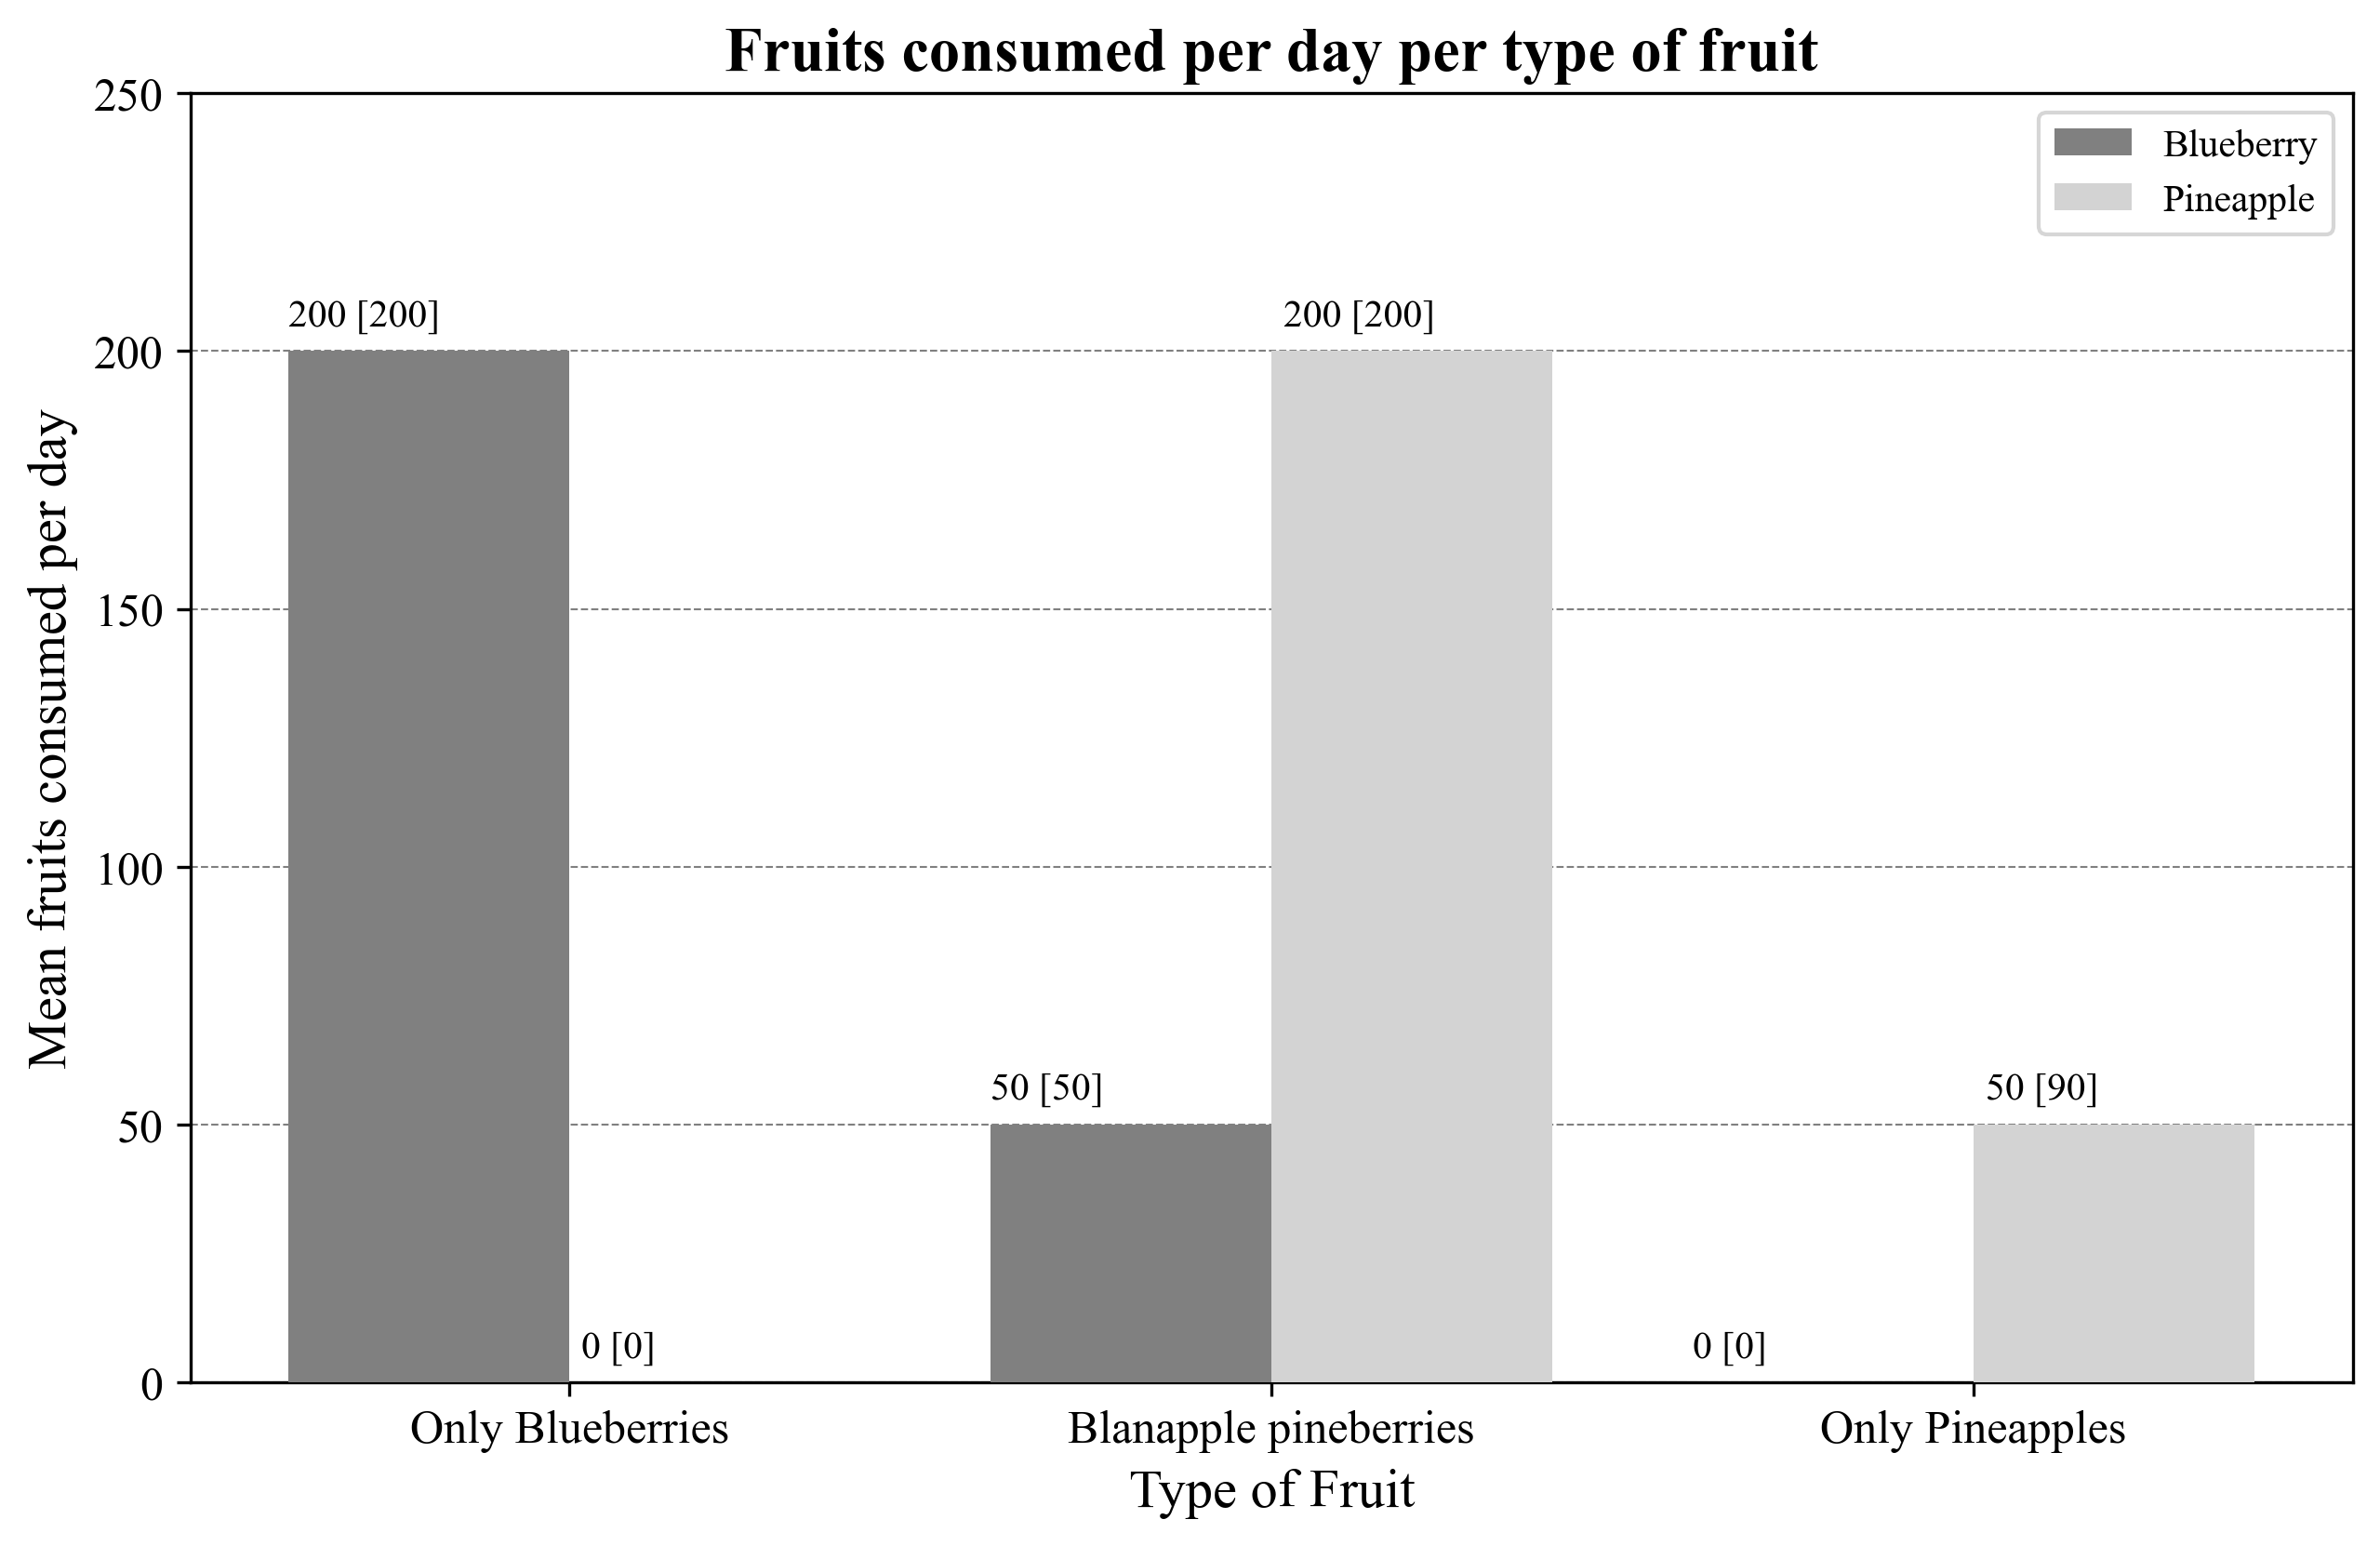

In [7]:
## making bar chart

# setting image resolution and size
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(10,6))

# label locations, width of bars
# so that we can put bars next to each other
r1 = np.arange(3)
bar_width = 0.4

# grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis="y")

# saving x and y values
# surprise tools that will help us later
x = ['Only Blueberries', 'Blanapple pineberries', 'Only Pineapples']
y1_val = data_means["Blueberry"]
y2_val = data_means["Pineapple"]
y1_label = df_labels["Blueberry"]
y2_label = df_labels["Pineapple"]

# we shall be making the subplots below
plt.bar(r1-bar_width/2, y1_val, width=bar_width, color="grey", zorder=10)
plt.bar(r1+bar_width/2, y2_val, width=bar_width, color="#D3D3D3", zorder=10)

# customising size
ax = plt.gca()
ax.set_ylim([0, 250])

# scaffolding
plt.xticks(r1, x, font=tnr, fontsize=12)
plt.yticks(font=tnr, fontsize=12)
plt.xlabel("Type of Fruit", font=tnr, fontsize=14)
plt.ylabel("Mean fruits consumed per day", font=tnr, fontsize=14)
plt.legend(["Blueberry", "Pineapple"], prop=tnr)
plt.title("Fruits consumed per day per type of fruit", font=tnr_b, fontsize=16)

# further scaffolding (bar labels) 
def add_labels(x, y1_val, y1_label, y2_val, y2_label):
    for i in range(len(x)):
            plt.text(i-0.4, y1_val[i]+5, y1_label[i], font=tnr)
            plt.text(i+0.017, y2_val[i]+5, y2_label[i], font=tnr)
add_labels(x, y1_val, y1_label, y2_val, y2_label)

# saving figure
plt.savefig("fruit_means.tiff")
plt.show()